In [46]:
#過学習は訓練モデルのデータにはぴったり合うが、テストデータには全く合わない

In [47]:
import numpy as np #numpy を npとして扱う
import matplotlib.pyplot as plt #matplotlib.pyplot を pltとして扱う

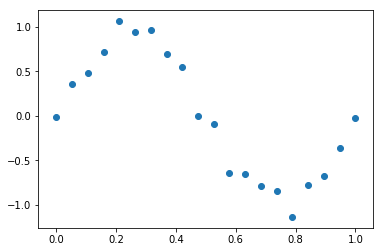

In [48]:
data_size = 20 #変数に20を収納
X = np.linspace(0,1,data_size) #0から1までの値を20個に等分した値
noise = np.random.uniform(low=-1.0,high=1.0,size=data_size) * 0.2 # -1から1までの一様分布を20個作り、それらに0.2をかけたものを変数に収納
y = np.sin(2.0 * np.pi * X) + noise #sinにXを2とπをかけたものにnoiseを足す

plt.scatter(X,y) #X,yのグラフを表示

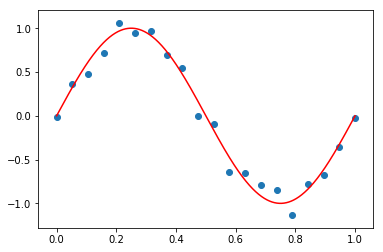

In [49]:
X_line = np.linspace(0,1,1000) #0から1までを1000等分する
y_line = np.sin(2.0*np.pi*X_line) #X_lineを2とπにかけたものをyとする

plt.plot(X_line,y_line,"red") #X_line,y_lineを赤の線で表示
plt.scatter(X,y) #散布図の表示、サイン派にノイズが乗ったものが表示される

In [50]:
from sklearn.linear_model import LinearRegression #sklearn.linear_model からLinearRegressionをインポート

In [51]:
lin_reg = LinearRegression().fit(X.reshape(-1,1),y) #fitでX,y の直線の式を作り線形回帰分析を行う、Xを1列でデータの数によって行を変えるようにする

In [52]:
lin_reg.coef_,lin_reg.intercept_ #切片と係数を表示

(array([-1.60347111]), 0.7880221191736267)

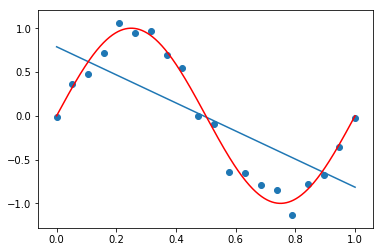

In [53]:
plt.plot(X_line,lin_reg.coef_*X_line+lin_reg.intercept_) #X_line,lin_reg.coef_*X_line+lin_reg.intercept_を引数とした線を表示

plt.plot(X_line,y_line,"red") #X_line,y_lineを赤線で表示
plt.scatter(X,y) #X,yの散布図を表示

In [54]:
X_2 = X**2 #Xの二乗をX_2に入れ込む

In [55]:
X_new = np.concatenate([X.reshape(-1,1),X_2.reshape(-1,1)],axis=1) #X,X_2を一つの行列に結合、20行2列となる

In [56]:
X_new #X_newを表示

array([[0.        , 0.        ],
       [0.05263158, 0.00277008],
       [0.10526316, 0.01108033],
       [0.15789474, 0.02493075],
       [0.21052632, 0.04432133],
       [0.26315789, 0.06925208],
       [0.31578947, 0.09972299],
       [0.36842105, 0.13573407],
       [0.42105263, 0.17728532],
       [0.47368421, 0.22437673],
       [0.52631579, 0.27700831],
       [0.57894737, 0.33518006],
       [0.63157895, 0.39889197],
       [0.68421053, 0.46814404],
       [0.73684211, 0.54293629],
       [0.78947368, 0.6232687 ],
       [0.84210526, 0.70914127],
       [0.89473684, 0.80055402],
       [0.94736842, 0.89750693],
       [1.        , 1.        ]])

In [57]:
lin_reg_2 = LinearRegression().fit(X_new,y) #X_new,yを引数に線形回帰分析を実行、

In [58]:
lin_reg_2.coef_,lin_reg_2.intercept_ #係数と切片を表示を表示

(array([-1.46041537, -0.14305573]), 0.7654343717434683)

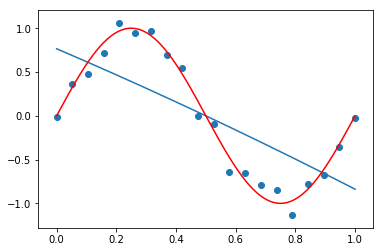

In [61]:
plt.plot(X_line,lin_reg_2.coef_[0]*X_line+lin_reg_2.coef_[1]*X_line**2+lin_reg_2.intercept_) 
#X_lineを説明変数、lin_reg_2.coef_[0]*X_line+lin_reg_2.coef_[1]*
X_line**2+lin_reg_2.intercept_ #目的変数とする重回帰式

plt.plot(X_line,y_line,"red") #X_line,y_lineを赤線で表示
plt.scatter(X,y) #X,yの散布図を表示

In [62]:
from sklearn.preprocessing import PolynomialFeatures #sklearn.preprocessing から PolynomialFeaturesをインポート

In [63]:
poly = PolynomialFeatures(degree=3) #PolynomialFeaturesを三次元までのデータを変数に収納
X_poly_3 = poly.fit_transform(X.reshape(-1,1)) #Xを1列20行の形にして、一から三次までのデータを変数に収納

In [64]:
X_poly_3 #X_poly_3を表示 

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.26315789e-02, 2.77008310e-03, 1.45793847e-04],
       [1.00000000e+00, 1.05263158e-01, 1.10803324e-02, 1.16635078e-03],
       [1.00000000e+00, 1.57894737e-01, 2.49307479e-02, 3.93643388e-03],
       [1.00000000e+00, 2.10526316e-01, 4.43213296e-02, 9.33080624e-03],
       [1.00000000e+00, 2.63157895e-01, 6.92520776e-02, 1.82242309e-02],
       [1.00000000e+00, 3.15789474e-01, 9.97229917e-02, 3.14914711e-02],
       [1.00000000e+00, 3.68421053e-01, 1.35734072e-01, 5.00072897e-02],
       [1.00000000e+00, 4.21052632e-01, 1.77285319e-01, 7.46464499e-02],
       [1.00000000e+00, 4.73684211e-01, 2.24376731e-01, 1.06283715e-01],
       [1.00000000e+00, 5.26315789e-01, 2.77008310e-01, 1.45793847e-01],
       [1.00000000e+00, 5.78947368e-01, 3.35180055e-01, 1.94051611e-01],
       [1.00000000e+00, 6.31578947e-01, 3.98891967e-01, 2.51931768e-01],
       [1.00000000e+00, 6.84210526e-01, 4.68144044e

In [65]:
lin_reg_3 =LinearRegression().fit(X_poly_3,y) #X_poly_3,yを引数に線形回帰分析を実行

In [66]:
poly = PolynomialFeatures(degree=3) #PolynomialFeaturesの三次元までのデータを変数に収納
X_line_poly_3 = poly.fit_transform(X_line.reshape(-1,1)) #X_line をもとに三乗までの項を作る、1000個のデータができる

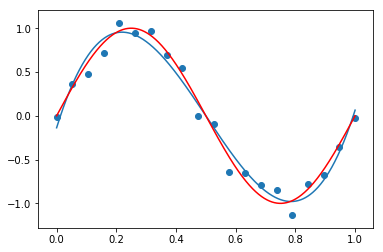

In [67]:
plt.plot(X_line,lin_reg_3.predict(X_line_poly_3)) #X_lineとX_line_poly_3を予測したものを引数に入れプロットする
#点をもとに線形回帰分析を実行したもの
plt.plot(X_line,y_line,"red") #X_line,y_lineを赤線で表示、元のサイン波
plt.scatter(X,y) #X,yの散布図を表示、ノイズの点

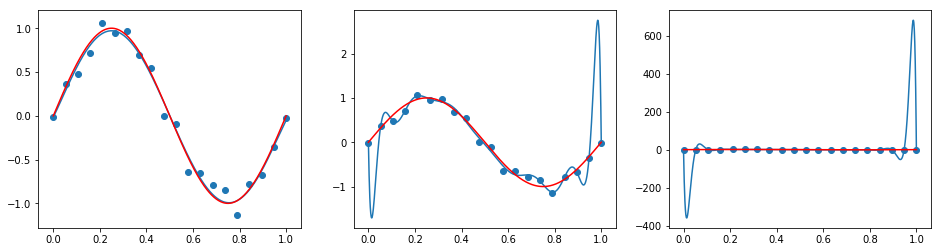

In [68]:
#項(data)を増やして線形回帰分析を実行した時の予想線

fig,axes = plt.subplots(1,3,figsize=(16,4)) #1行3列のグラフの窓を作る

for degree,ax in zip([5,15,20],axes): #項の数（5，15，20）をdegreeに順入れ、データの数(3)になるまで順にaxに入れる
    poly = PolynomialFeatures(degree=degree) #PolynomialFeaturesの次元数にdegreeが入る
    X_poly = poly.fit_transform(X.reshape(-1,1)) #それぞれの次元数に合わせた行列を作る
    lin_reg = LinearRegression().fit(X_poly,y) #X_poly,yを引数に線形回帰分析を実行
    X_line_poly = poly.fit_transform(X_line.reshape(-1,1)) #X_lineをもとに説明変数を増やす
    
    ax.plot(X_line,lin_reg.predict(X_line_poly)) #増やした説明変数をもとに予想値を出す
    ax.plot(X_line,y_line,"red") #サイン波を赤線で表示
    ax.scatter(X,y) #ノイズの分布図を表示
    
#データが増えるほど、ノイズまで正確に予想しようとしてデータのコア、革新、本質的な予想ができなくなる